# 股价分析与预测

使用fbprophet进行时间序列预测：https://facebook.github.io/prophet/

比较主流的观点认为，时间序列受四种成分影响：

- 趋势：宏观、长期、持续性的作用力，比如我国房地产价格；

- 周期：比如商品价格在较短时间内，围绕某个均值上下波动；

- 季节：变化规律相对固定，并呈现某种周期特征。比如每年国内航班的旅客数、空调销售量、每周晚高峰时间等。“季节”不一定按年计。每周、每天的不同时段的规律，也可称作季节性。

- 随机：随机的不确定性，比如10分钟内A股的股指变化，也是人们常说的随机过程(Stochastic Process）

主流时间序列算法：自回归、移动平均和整合模型

Prophet的亮点

并不是所有问题都可以用同样的程序解决。Prophet所针对的，是Facebook的商业预测任务，这些任务一般具有以下特征：

- 按小时、日、周的观测值，至少是几个月的历史数据（最好是一年）；
- 多种和人类活动相关的强周期性：比如每周的某日，一年中的某个时间；
- 按不确定间隔出现，已知的重要节假日，比如超级碗（Super Bowl)；
- 合理数量的空白观测值或异常值；
- 时间趋势会转折，比如新产品发布；
- 非线性增长的趋势，比如到达了某种自然局限或饱和。


In [1]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

安装工具

* pip install quandl获取数据集
* pip install fbprophet数据分析工具
* pip install pytrends  

In [2]:
from stocker import Stocker

In [3]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 to 2018-01-24.


展示数据

In [4]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


使用stock绘画数据的收盘价情况

Maximum Adj. Close = 91.90 on 2018-01-23.
Minimum Adj. Close = 0.06 on 1986-03-24.
Current Adj. Close = 91.90 on 2018-01-23.



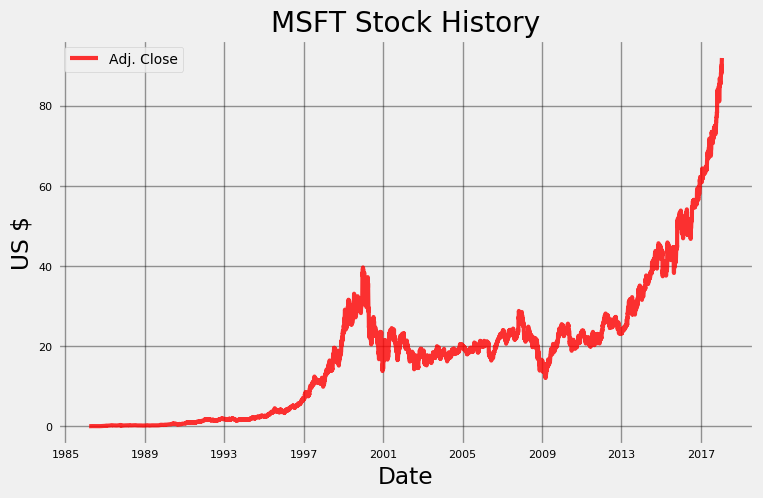

In [7]:
microsoft.plot_stock()

绘画Daily Change的情况

Maximum Daily Change = 2.08 on 2008-10-13.
Minimum Daily Change = -3.34 on 2017-12-04.
Current Daily Change = 1.61 on 2018-01-22.

Maximum Adj. Volume = 591052200.00 on 2006-04-28.
Minimum Adj. Volume = 7425503.00 on 2017-11-24.
Current Adj. Volume = 23190700.00 on 2018-01-22.



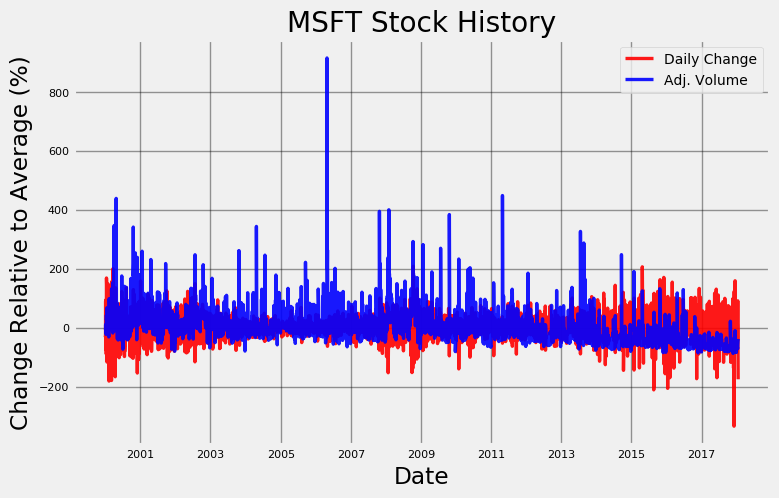

In [6]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

盈利的情况，假如买了100万股

MSFT Total buy and hold profit from 1986-03-13 to 2018-01-16 for 100 shares = $8829.11


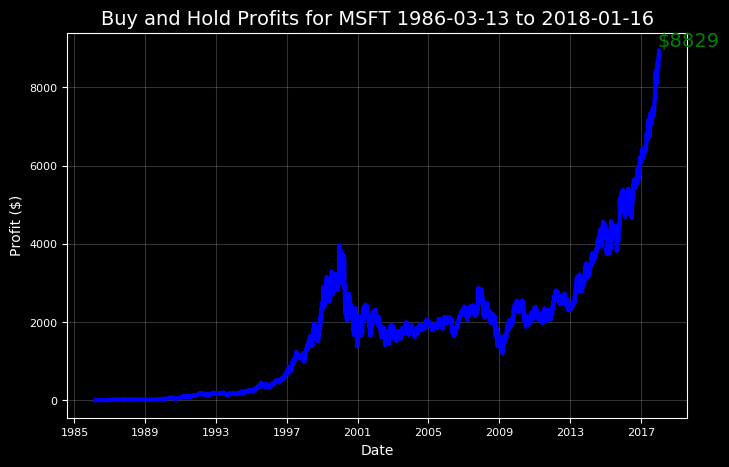

In [8]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

亏损的情况

MSFT Total buy and hold profit from 1999-01-05 to 2002-01-03 for 100 shares = $-56.92


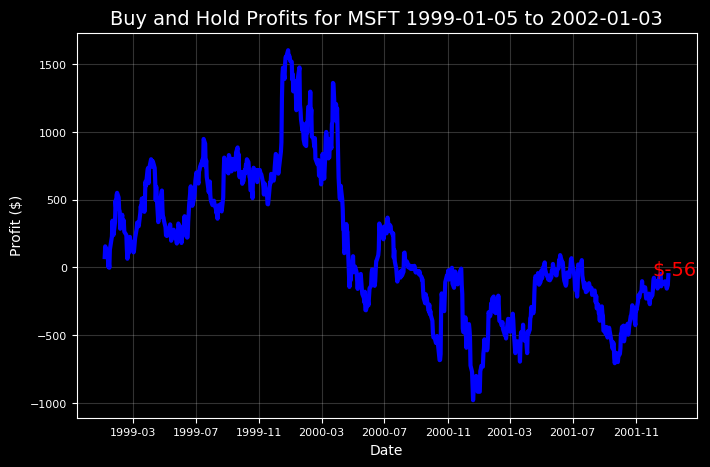

In [9]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

使用prophet创造模型

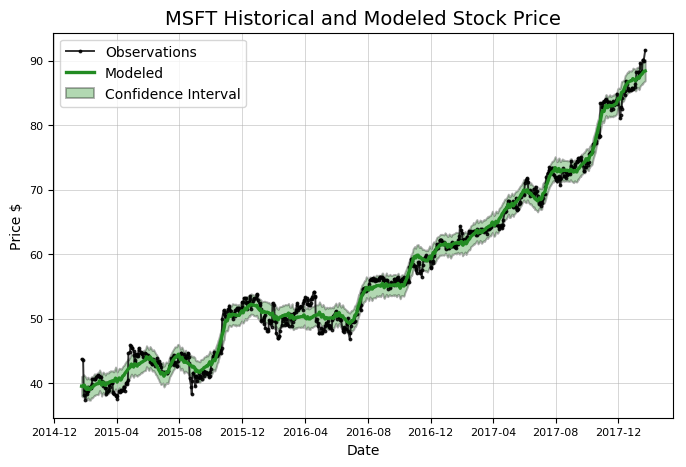

In [9]:
model, model_data = microsoft.create_prophet_model()

趋势情况

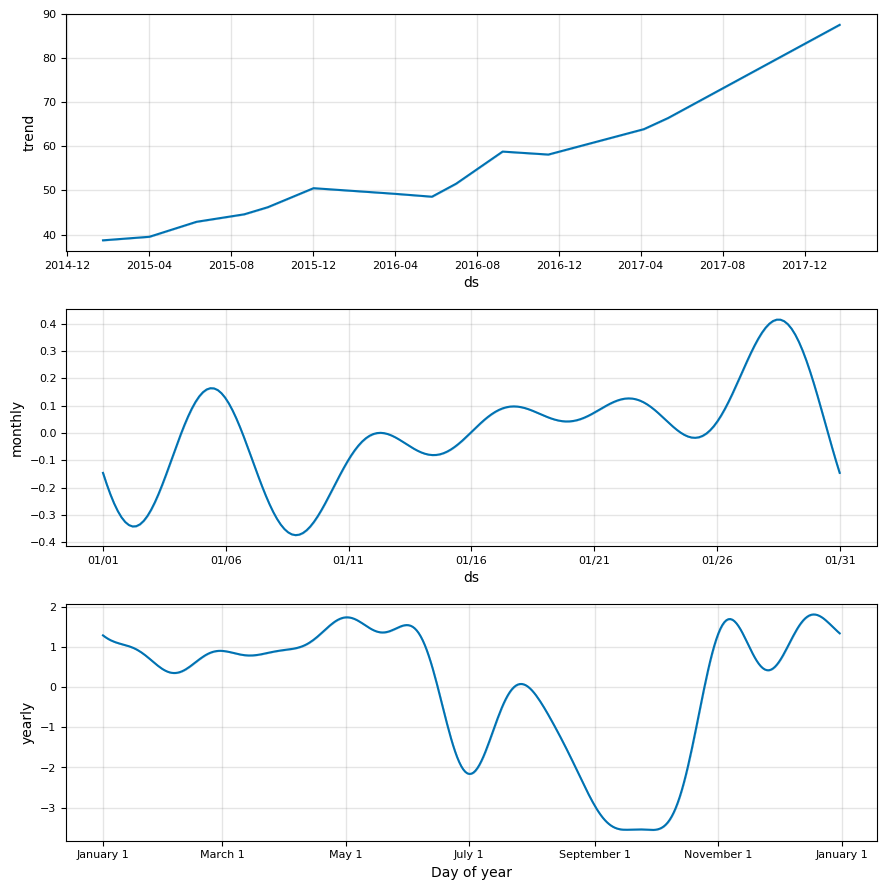

In [10]:
model.plot_components(model_data)
plt.show()

过去三年，总的趋势显然是向上的。
在一年内，总的趋势往往是七月、九月和十月下降，十二月和一月最大增幅。每个月底的时候变化较小
并加入星期的趋势

In [11]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


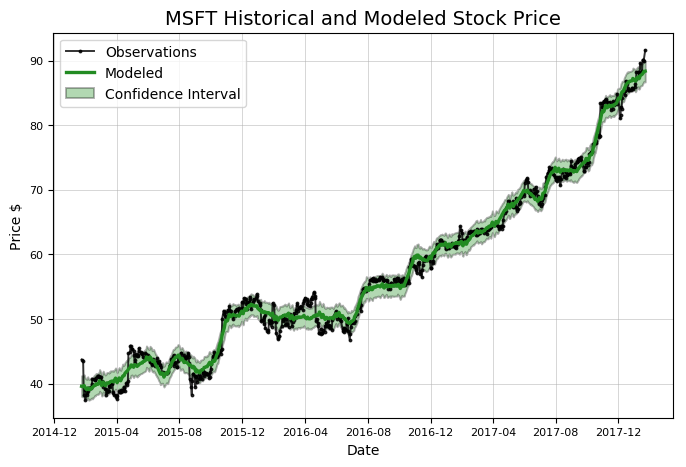

In [12]:
model, model_data = microsoft.create_prophet_model(days=0)

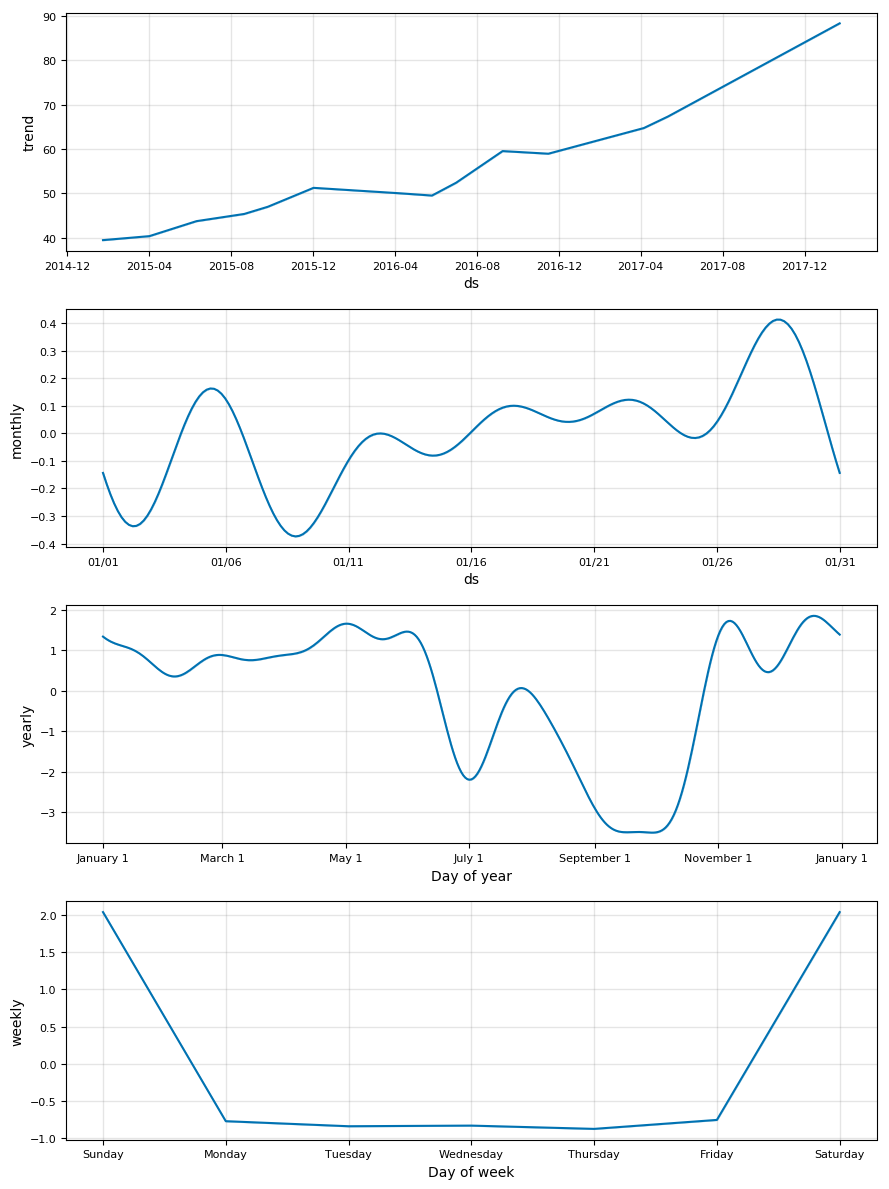

In [13]:
model.plot_components(model_data)
plt.show()

设置股票只能工作日交易

In [11]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False

观察数据中的突变点（考察二阶导）


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
410 2016-09-08   55.811396 -1.378093
338 2016-05-26   50.113453  1.116720
217 2015-12-02   52.572008 -0.882359
458 2016-11-15   57.589819  0.603127
48  2015-04-02   37.612590  0.442776


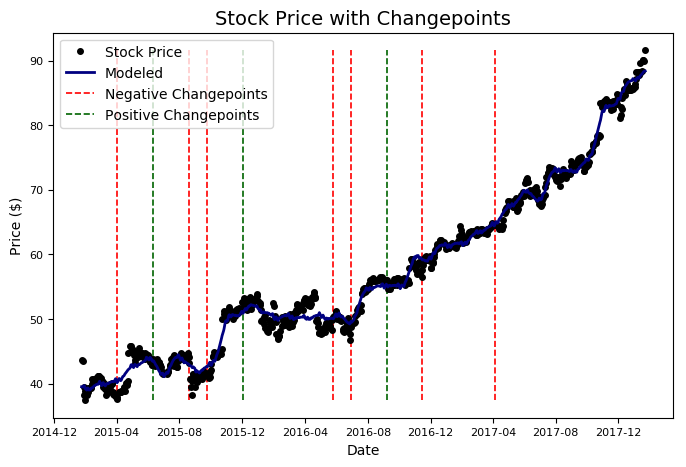

In [15]:
microsoft.changepoint_date_analysis()

使用prophet的模型进行预测

Predicted Price on 2018-07-21 = $102.40


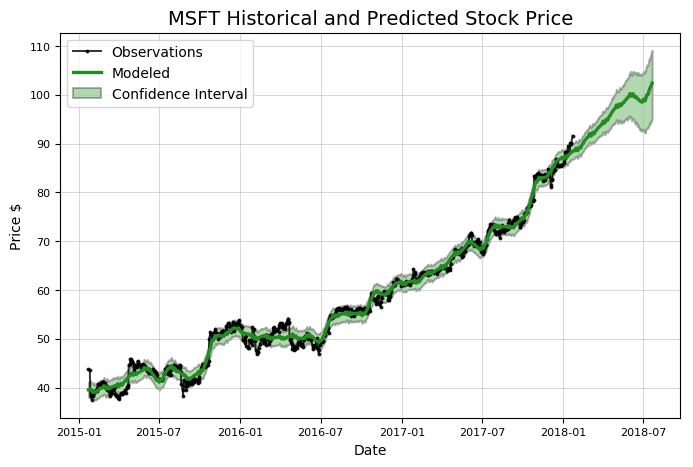

In [18]:
model, future = microsoft.create_prophet_model(days=180)

模型训练调优

In [ ]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

用类似的方法研究亚马逊的股票

In [ ]:
from stocker import Stocker

In [ ]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-01-23.


展示股票的基本情况


Maximum Adj. Close = 1362.54 on 2018-01-23.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1362.54 on 2018-01-23.



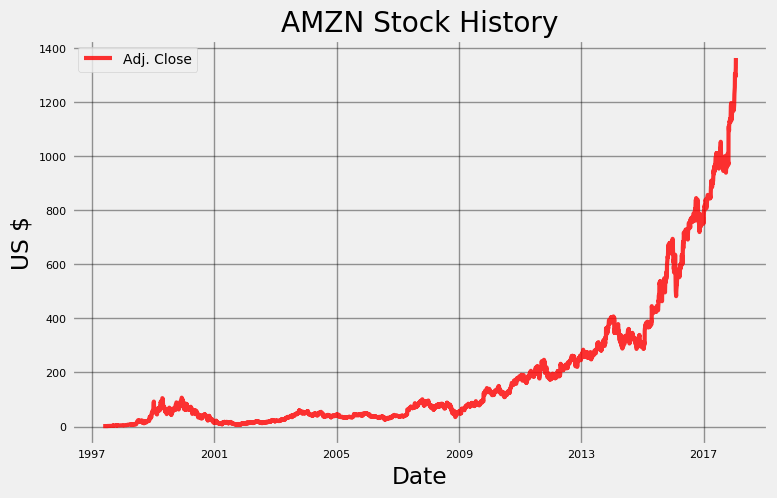

In [ ]:
amazon.plot_stock()

### Daily Changes

Maximum Daily Change = 42.81 on 2017-10-27.
Minimum Daily Change = -49.57 on 2015-07-24.
Current Daily Change = 24.45 on 2018-01-23.



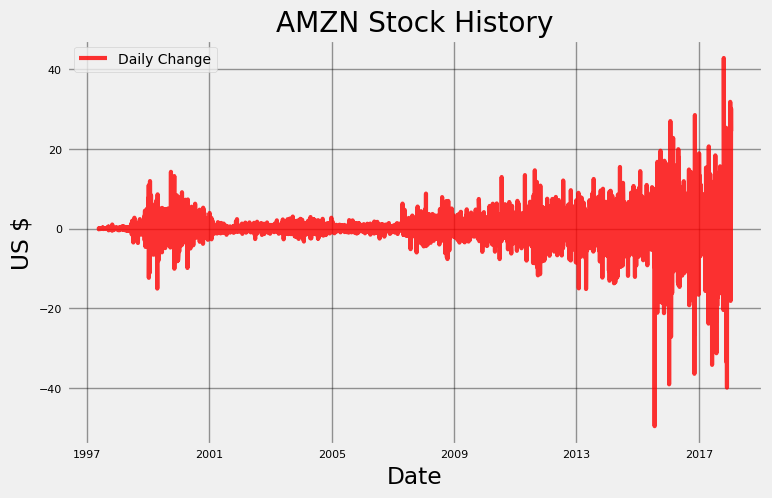

In [ ]:
amazon.plot_stock(stats=['Daily Change'])

用过去三年的数据来进行建模，先不着急预测 

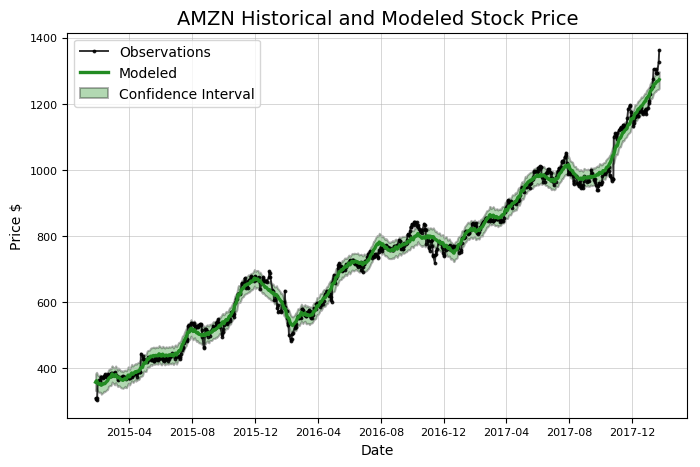

In [ ]:
model, model_data = amazon.create_prophet_model()

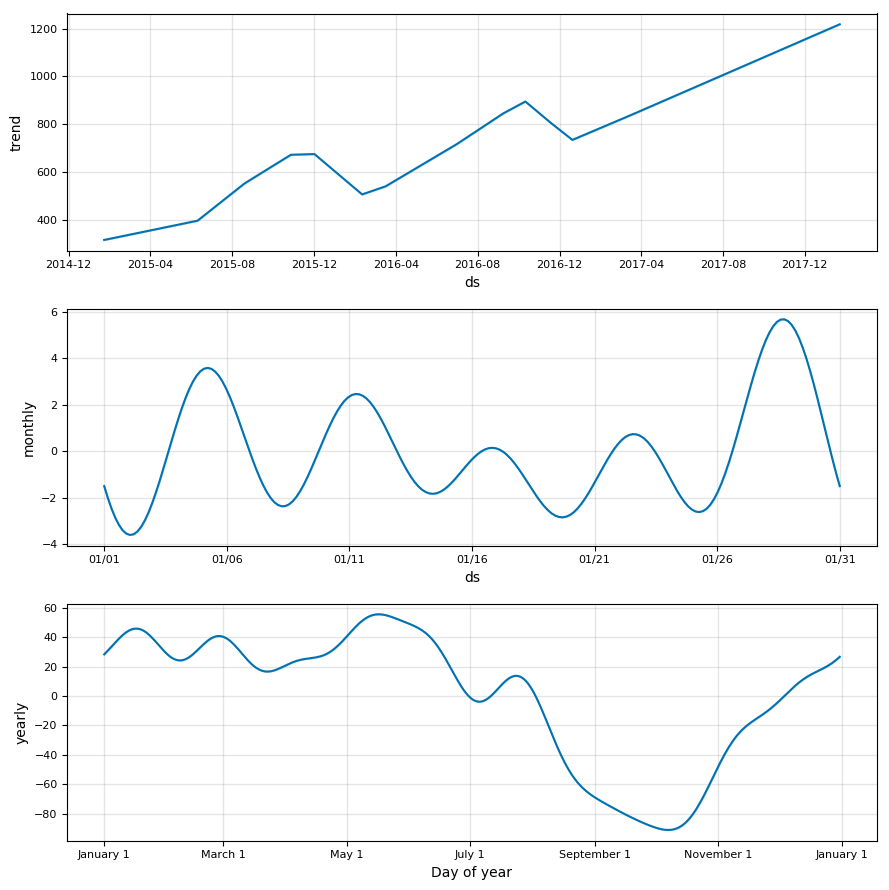

In [ ]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

我们可以来制定预测的天数，设置时间为三个月

Predicted Price on 2018-04-23 = $1366.17


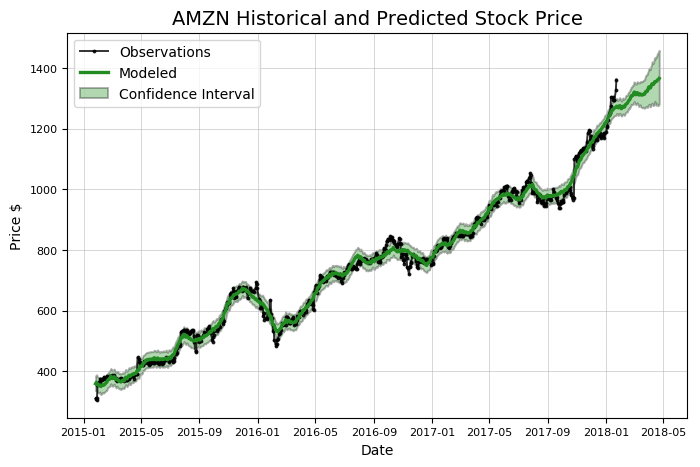

In [ ]:
model, model_data = amazon.create_prophet_model(days=90)

观察可以发现，我们的模型其实是更保守一些的，它会降低一些离群数据对结果的影响。

模型评估：
评估的指标包括：真实值和预测值之间的平均误差，上升与下降趋势，置信区间


Prediction Range: 2017-01-23 to 2018-01-23.

Predicted price on 2018-01-20 = $855.17.
Actual price on    2018-01-19 = $1294.58.

Average Absolute Error on Training Data = $18.23.
Average Absolute Error on Testing  Data = $164.56.

When the model predicted an increase, the price increased 56.64% of the time.
When the model predicted a  decrease, the price decreased  43.81% of the time.

The actual value was within the 80% confidence interval 24.10% of the time.


E:\PythonNotebook\机器学习\随机森林\stocker\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1


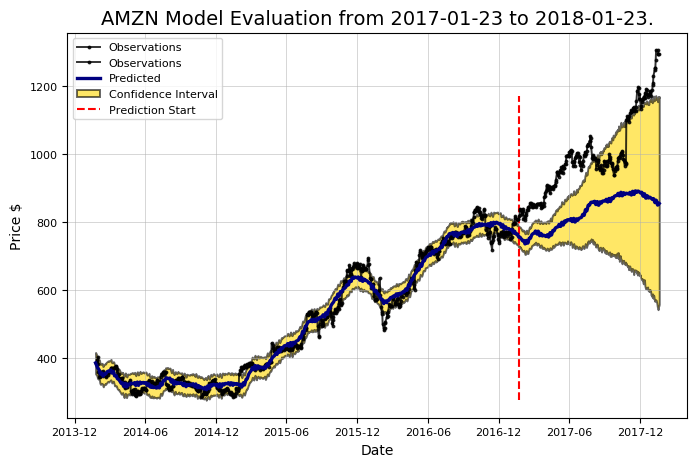

In [ ]:
amazon.evaluate_prediction()

模型看起来效果并不好，需要优化

- **Changepoint Prior Scale** 

该参数指定了突变点的权重，突变点就是那些突然上升，下降，或者是幅度突然变化明显的

* 权重大了，模型就会越符合于我们当前的训练数据集，但是过拟合也更大了。
* 权重小了，模型可能就欠拟合了，达不到我们预期的要求了。

调整参数验证对模型的影响：

选择了4组参数[0.001, 0.05, 0.1, 0.2]来观察结果

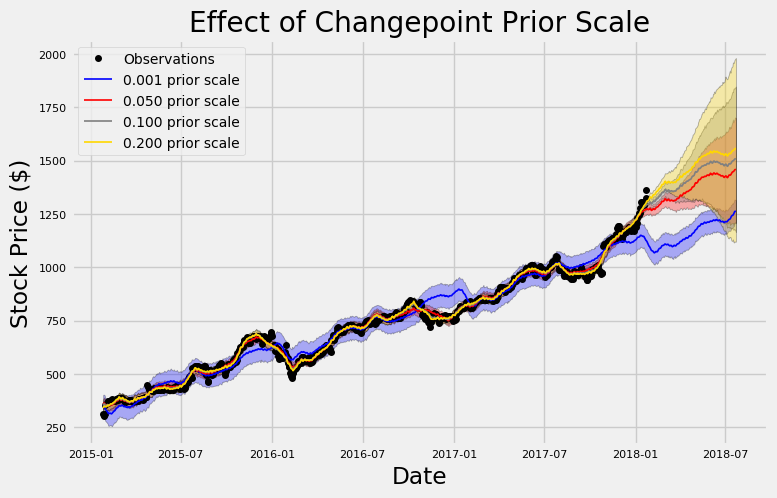

In [ ]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

- 先来看蓝色的线，它的参数值设置的是最小的，看起来它在自己玩自己的，非常平均，但是欠拟合很明显
- 对于黄色的线，它非常接近于我们的训练数据集，层次鲜明，但是过拟合问题又很头疼
- 默认的参数是0.05，它在中间位置

评估模型的表现情况


Validation Range 2016-01-04 to 2017-01-03.

     cps  train_err  train_range    test_err  test_range
0  0.001  44.475809   152.841613  149.373638  152.841541
1  0.050  11.203019    35.788779  152.033810  140.260382
2  0.100  10.722908    34.650575  152.903481  179.199686
3  0.200   9.725255    31.909034  127.604543  329.325001


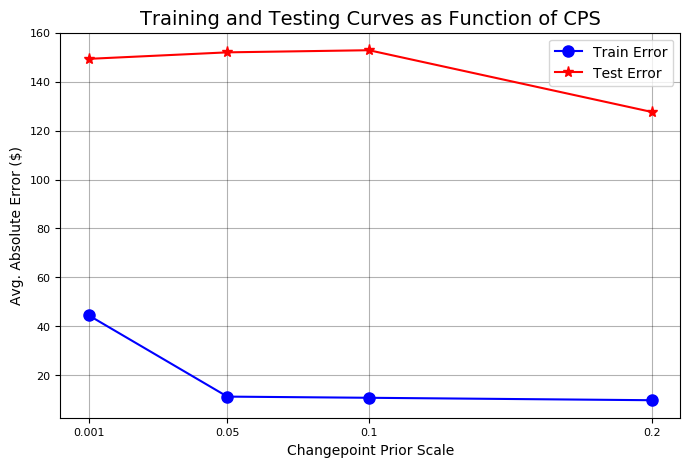

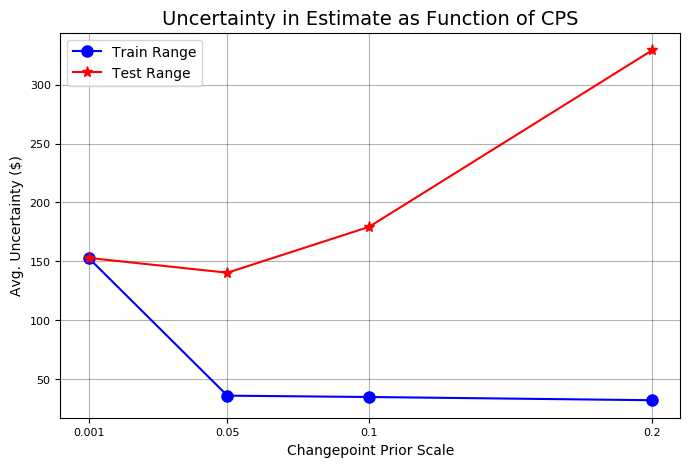

In [ ]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

实验发现稍微大一点的权重会使得我们的test error更低。于是我们来试试结果对参数增长的敏感度


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range    test_err   test_range
0  0.25   9.252699    30.686445  114.198811   451.654025
1  0.40   8.546549    28.809594   78.462455   768.760178
2  0.50   8.421606    28.542588   72.964334   819.560631
3  0.60   8.253096    28.000743   66.301627   949.097852
4  0.70   8.177868    27.857483   66.585793   920.312754
5  0.80   8.142373    27.763866   67.160883  1013.350436


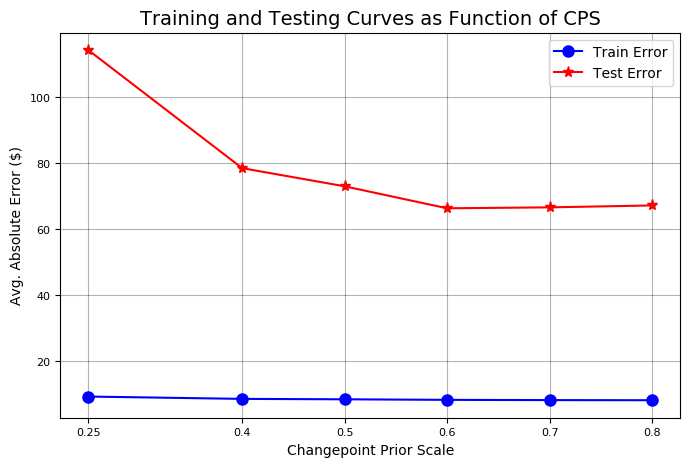

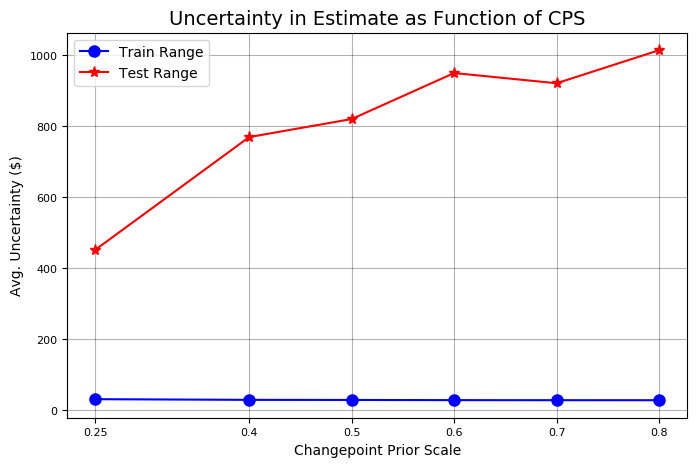

In [ ]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.25,0.4, 0.5, 0.6,0.7,0.8])

通过实验发现0.6为最合适的值

In [ ]:
amazon.changepoint_prior_scale = 0.6

再次评估模型


Prediction Range: 2017-01-23 to 2018-01-23.

Predicted price on 2018-01-20 = $1263.98.
Actual price on    2018-01-19 = $1294.58.

Average Absolute Error on Training Data = $10.42.
Average Absolute Error on Testing  Data = $158.89.

When the model predicted an increase, the price increased 57.92% of the time.
When the model predicted a  decrease, the price decreased  47.69% of the time.

The actual value was within the 80% confidence interval 89.16% of the time.


E:\PythonNotebook\机器学习\随机森林\stocker\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1


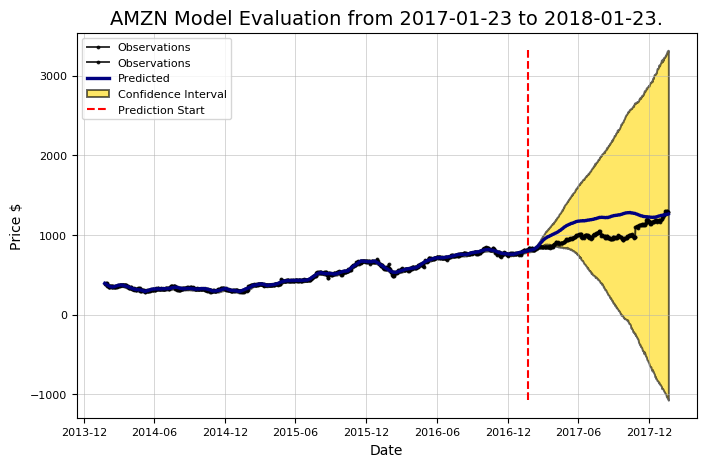

In [ ]:
amazon.evaluate_prediction()

In [1]:
amazon.evaluate_prediction(nshares=1000)

NameError: name 'amazon' is not defined

You played the stock market in AMZN from 2008-01-03 to 2009-01-05 with 1000 shares.

When the model predicted an increase, the price increased 43.27% of the time.
When the model predicted a  decrease, the price decreased  55.00% of the time.

The total profit using the Prophet model = $-38260.00.
The Buy and Hold strategy profit =         $-43930.00.

Thanks for playing the stock market!



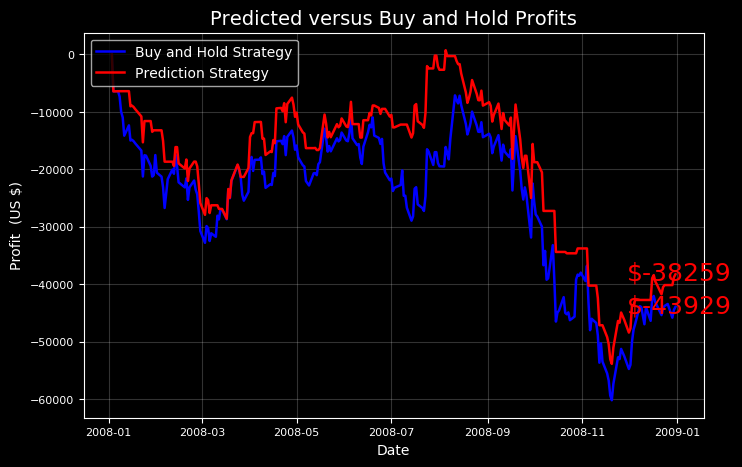

In [ ]:
amazon.evaluate_prediction(start_date = '2008-01-03', end_date = '2009-01-05', nshares=1000)

预测未来的价格


Predicted Increase: 

        Date     estimate     change        upper        lower
1 2018-01-23  1306.228442   6.025072  1325.657688  1285.862847
2 2018-01-24  1311.564033   5.335591  1331.135478  1290.675662
3 2018-01-25  1314.109191   2.545158  1333.532189  1294.738520
4 2018-01-26  1315.050236   0.941045  1335.782839  1297.670593
6 2018-01-28  1327.643659  12.593423  1347.452667  1308.042842
7 2018-01-29  1329.362177   1.718518  1348.448071  1309.709329
8 2018-01-30  1334.349879   4.987701  1353.295355  1314.949842
9 2018-01-31  1336.068697   1.718819  1356.096798  1316.727266

Predicted Decrease: 

         Date     estimate    change        upper        lower
10 2018-02-01  1334.473118 -1.595579  1356.152481  1313.691556


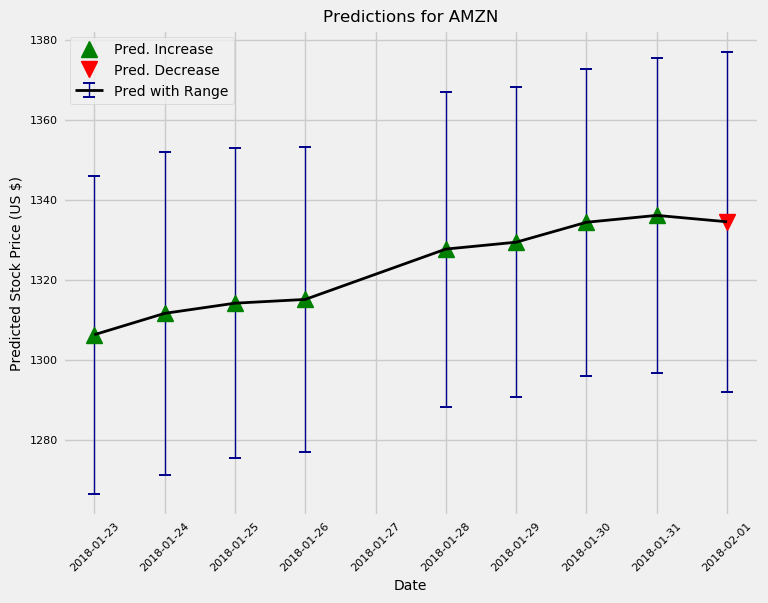

In [ ]:
amazon.predict_future(days=10)


Predicted Increase: 

          Date     estimate     change        upper        lower
1   2018-01-23  1306.228442   6.025072  1326.161058  1288.043281
2   2018-01-24  1311.564033   5.335591  1331.453768  1291.165245
3   2018-01-25  1314.109191   2.545158  1332.027122  1293.957448
4   2018-01-26  1315.050236   0.941045  1335.034202  1293.421066
6   2018-01-28  1327.643659  12.593423  1348.690399  1307.735908
7   2018-01-29  1329.362177   1.718518  1348.764027  1308.724903
8   2018-01-30  1334.349879   4.987701  1354.423431  1316.151848
9   2018-01-31  1336.068697   1.718819  1357.488546  1316.962015
13  2018-02-04  1344.427783  11.606116  1367.526264  1322.719958
14  2018-02-05  1345.053218   0.625434  1368.103802  1322.951085
15  2018-02-06  1348.389628   3.336410  1371.113281  1326.592277
16  2018-02-07  1349.548072   1.158444  1374.324334  1327.575564
17  2018-02-08  1349.692806   0.144734  1373.166019  1327.535413
18  2018-02-09  1351.331035   1.638229  1376.361037  1329.155187
20

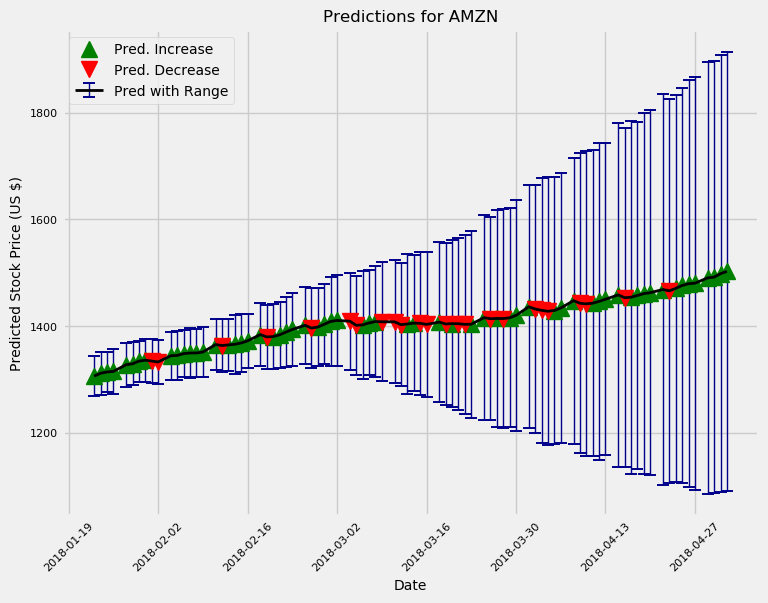

In [ ]:
amazon.predict_future(days=100)

我们预测的时间越长，不确定性就越大，这是可以预料到的。因为初始预测值具有一定的不确定性，并且下一个值是基于之前的值做出的，因此可能值的范围会随着时间的推移而扩大。（累计误差类似）